## 時系列データの準備
- 次のsin関数 + ノイズが入った時系列データををRNNで近似するよ

$$
\begin{gather*}
    f(t) = \sin\Big( \frac{2\pi}{T}t \Big) + 0.05u , (t = 1, \dots, 2T)     \\
    u \sim U(-1.0, 1.0)
\end{gather*}
$$

In [1]:
import numpy as np

def sin(t, T = 100):
    return np.sin(2.0*np.pi * t/T)

def toy_problem(T = 100, coef = 0.05):
    x = np.arange(0, 2 * T + 1)
    noise = coef * np.random.uniform(low = -1.0, high = 1.0, size = len(x))

    return sin(t = x) + noise

In [2]:
T = 100
f = toy_problem(T).astype(np.float32)
length_sequences = len(f)    # represent 2T + 1

- モデルに入出力するデータの長さは一定長に分割しなければならないが、ここでは$\tau = 25$を採用する

In [3]:
tau = 25

x = []    # input
t = []    # output

for i in range(length_sequences - tau):
    x.append(f[i:i+tau])
    t.append(f[i+tau])
    
x = np.array(x).reshape(-1, tau, 1)
t = np.array(t).reshape(-1, 1)

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_val, t_train, t_val = train_test_split(x, t, test_size = 0.2, shuffle = False)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import matplotlib.pyplot as plt

class RNN(nn.Module):
    def __init__(self, hidden_dim):
        super().__init__()
        self.layer1 = nn.RNN(1, hidden_dim, 
                                nonlinearity = "tanh", 
                                batch_first = True)
        self.fc1 = nn.Linear(hidden_dim, 1)

        nn.init.xavier_normal_(self.layer1.weight_ih_l0)
        nn.init.orthogonal_(self.layer1.weight_hh_l0)

    def forward(self, x):
        x, _ = self.layer1(x)
        output = self.fc1(x[:, -1])  # 出力層には最後のhidden layerの出力を与えたいのでこうする
        return output

In [6]:
model = RNN(hidden_dim = 50)
print(model)

RNN(
  (layer1): RNN(1, 50, batch_first=True)
  (fc1): Linear(in_features=50, out_features=1, bias=True)
)


In [7]:
from trainer import trainer

In [8]:
train_loss, val_loss = trainer(model, train_data = x, target_data = t, epoch_num = 1000)

We use cuda:0
epoch1/1000
1回目のepochでの訓練Loss: 0.22998985648155212 検証Loss: 0.13812091946601868
epoch2/1000
2回目のepochでの訓練Loss: 0.12152537703514099 検証Loss: 0.06408914178609848
epoch3/1000
3回目のepochでの訓練Loss: 0.05839793011546135 検証Loss: 0.03174284100532532
epoch4/1000
4回目のepochでの訓練Loss: 0.026544757187366486 検証Loss: 0.015443557873368263
epoch5/1000
5回目のepochでの訓練Loss: 0.014427905902266502 検証Loss: 0.011457215994596481
epoch6/1000
6回目のepochでの訓練Loss: 0.012492919340729713 検証Loss: 0.01568574458360672
epoch7/1000
7回目のepochでの訓練Loss: 0.016059412620961666 検証Loss: 0.01701587252318859
epoch8/1000
8回目のepochでの訓練Loss: 0.01689240150153637 検証Loss: 0.012859117239713669
epoch9/1000
9回目のepochでの訓練Loss: 0.012145027983933687 検証Loss: 0.008409012109041214
epoch10/1000
10回目のepochでの訓練Loss: 0.007605362683534622 検証Loss: 0.006660474464297295
epoch11/1000
11回目のepochでの訓練Loss: 0.006650382885709405 検証Loss: 0.007330115418881178
epoch12/1000
12回目のepochでの訓練Loss: 0.007298093056306243 検証Loss: 0.007095980457961559
epoch13/1000
13回目

64回目のepochでの訓練Loss: 0.0011622350430116057 検証Loss: 0.001159635721705854
epoch65/1000
65回目のepochでの訓練Loss: 0.001124003145378083 検証Loss: 0.0012054507387802005
epoch66/1000
66回目のepochでの訓練Loss: 0.001140921434853226 検証Loss: 0.001173345255665481
epoch67/1000
67回目のepochでの訓練Loss: 0.0011402163654565811 検証Loss: 0.0011769228149205446
epoch68/1000
68回目のepochでの訓練Loss: 0.001063059113221243 検証Loss: 0.001278204028494656
epoch69/1000
69回目のepochでの訓練Loss: 0.0011279977625235915 検証Loss: 0.0011717579327523708
epoch70/1000
70回目のepochでの訓練Loss: 0.0011103659635409713 検証Loss: 0.0011561809806153178
epoch71/1000
71回目のepochでの訓練Loss: 0.001201430568471551 検証Loss: 0.001029245206154883
epoch72/1000
72回目のepochでの訓練Loss: 0.0011706684599630535 検証Loss: 0.001072190934792161
epoch73/1000
73回目のepochでの訓練Loss: 0.0010420908220112324 検証Loss: 0.0012855647364631295
epoch74/1000
74回目のepochでの訓練Loss: 0.00113059050636366 検証Loss: 0.0012105392524972558
epoch75/1000
75回目のepochでの訓練Loss: 0.0010941658983938396 検証Loss: 0.0012268516002222896
epoc

epoch127/1000
127回目のepochでの訓練Loss: 0.001088312128558755 検証Loss: 0.0011001238599419594
epoch128/1000
128回目のepochでの訓練Loss: 0.0011007172288373113 検証Loss: 0.00102490175049752
epoch129/1000
129回目のepochでの訓練Loss: 0.0010198563104495406 検証Loss: 0.0011427757563069463
epoch130/1000
130回目のepochでの訓練Loss: 0.0011305646039545536 検証Loss: 0.0010836997535079718
epoch131/1000
131回目のepochでの訓練Loss: 0.0010032502468675375 検証Loss: 0.001233792514540255
epoch132/1000
132回目のepochでの訓練Loss: 0.0011024513514712453 検証Loss: 0.0010870390105992556
epoch133/1000
133回目のepochでの訓練Loss: 0.0010550824808888137 検証Loss: 0.0011849799193441868
epoch134/1000
134回目のepochでの訓練Loss: 0.0011520444531925023 検証Loss: 0.0010488034458830953
epoch135/1000
135回目のepochでの訓練Loss: 0.001139400148531422 検証Loss: 0.0010370751842856407
epoch136/1000
136回目のepochでの訓練Loss: 0.0010797347349580377 検証Loss: 0.001099140616133809
epoch137/1000
137回目のepochでの訓練Loss: 0.00104557751910761 検証Loss: 0.0011406615376472473
epoch138/1000
138回目のepochでの訓練Loss: 0.00106903607957

epoch189/1000
189回目のepochでの訓練Loss: 0.0009620501950848848 検証Loss: 0.0011552086798474193
epoch190/1000
190回目のepochでの訓練Loss: 0.0011115684756077826 検証Loss: 0.0009177984320558608
epoch191/1000
191回目のepochでの訓練Loss: 0.0009895130060613155 検証Loss: 0.0010400513419881463
epoch192/1000
192回目のepochでの訓練Loss: 0.0010801799944601953 検証Loss: 0.000905485125258565
epoch193/1000
193回目のepochでの訓練Loss: 0.0009775917860679328 検証Loss: 0.001073720515705645
epoch194/1000
194回目のepochでの訓練Loss: 0.000975853850832209 検証Loss: 0.0010079353814944625
epoch195/1000
195回目のepochでの訓練Loss: 0.0009407407487742603 検証Loss: 0.0010471440618857741
epoch196/1000
196回目のepochでの訓練Loss: 0.0009011380607262254 検証Loss: 0.0011042518308386207
epoch197/1000
197回目のepochでの訓練Loss: 0.0010659977560862899 検証Loss: 0.0009441336733289063
epoch198/1000
198回目のepochでの訓練Loss: 0.0010022477363236248 検証Loss: 0.0010371211683377624
epoch199/1000
199回目のepochでの訓練Loss: 0.001085965195670724 検証Loss: 0.0009339423268102109
epoch200/1000
200回目のepochでの訓練Loss: 0.0009747612

epoch251/1000
251回目のepochでの訓練Loss: 0.0009201431821566075 検証Loss: 0.000999236130155623
epoch252/1000
252回目のepochでの訓練Loss: 0.0009886914340313524 検証Loss: 0.0009281691745854914
epoch253/1000
253回目のepochでの訓練Loss: 0.0009776986844372004 検証Loss: 0.0009347618324682117
epoch254/1000
254回目のepochでの訓練Loss: 0.0009746275027282536 検証Loss: 0.000954116927459836
epoch255/1000
255回目のepochでの訓練Loss: 0.0010066137474495918 検証Loss: 0.0009504641639068723
epoch256/1000
256回目のepochでの訓練Loss: 0.0009432539809495211 検証Loss: 0.0009714961634017527
epoch257/1000
257回目のepochでの訓練Loss: 0.0009723512048367411 検証Loss: 0.0009526768117211759
epoch258/1000
258回目のepochでの訓練Loss: 0.0009424966410733759 検証Loss: 0.0009568336536176503
epoch259/1000
259回目のepochでの訓練Loss: 0.0009379094699397683 検証Loss: 0.0009511585813015699
epoch260/1000
260回目のepochでの訓練Loss: 0.0009306209103669971 検証Loss: 0.0009983410127460957
epoch261/1000
261回目のepochでの訓練Loss: 0.0009655120957177132 検証Loss: 0.0009354861103929579
epoch262/1000
262回目のepochでの訓練Loss: 0.00094501

epoch313/1000
313回目のepochでの訓練Loss: 0.0008777134353294969 検証Loss: 0.001010095584206283
epoch314/1000
314回目のepochでの訓練Loss: 0.0009299148805439472 検証Loss: 0.0009364180732518435
epoch315/1000
315回目のepochでの訓練Loss: 0.0010131383023690432 検証Loss: 0.0008354129386134446
epoch316/1000
316回目のepochでの訓練Loss: 0.0009249990107491612 検証Loss: 0.0009481066954322159
epoch317/1000
317回目のepochでの訓練Loss: 0.0009495671256445348 検証Loss: 0.000903428765013814
epoch318/1000
318回目のepochでの訓練Loss: 0.0009361765114590526 検証Loss: 0.0009089839295484126
epoch319/1000
319回目のepochでの訓練Loss: 0.0009132215054705739 検証Loss: 0.0009645074023865163
epoch320/1000
320回目のepochでの訓練Loss: 0.0009520498861093074 検証Loss: 0.000868669303599745
epoch321/1000
321回目のepochでの訓練Loss: 0.0009360020339954644 検証Loss: 0.0009041247540153563
epoch322/1000
322回目のepochでの訓練Loss: 0.0009476284612901509 検証Loss: 0.000920661143027246
epoch323/1000
323回目のepochでの訓練Loss: 0.0008844690746627748 検証Loss: 0.0009516376303508878
epoch324/1000
324回目のepochでの訓練Loss: 0.0008945569

epoch375/1000
375回目のepochでの訓練Loss: 0.0008831448503769934 検証Loss: 0.0009167364914901555
epoch376/1000
376回目のepochでの訓練Loss: 0.0008302224159706384 検証Loss: 0.000969938060734421
epoch377/1000
377回目のepochでの訓練Loss: 0.0008818471687845886 検証Loss: 0.0008997134864330292
epoch378/1000
378回目のepochでの訓練Loss: 0.0008889814198482782 検証Loss: 0.0009032705565914512
epoch379/1000
379回目のepochでの訓練Loss: 0.0008778842457104474 検証Loss: 0.0009074585395865142
epoch380/1000
380回目のepochでの訓練Loss: 0.0008967781614046544 検証Loss: 0.0008967045578174293
epoch381/1000
381回目のepochでの訓練Loss: 0.0009415268432348967 検証Loss: 0.0008394214673899114
epoch382/1000
382回目のepochでの訓練Loss: 0.0008908460731618106 検証Loss: 0.0008839251822791994
epoch383/1000
383回目のepochでの訓練Loss: 0.0009183156362269074 検証Loss: 0.0009083516779355705
epoch384/1000
384回目のepochでの訓練Loss: 0.000862306886119768 検証Loss: 0.0009269731235690415
epoch385/1000
385回目のepochでの訓練Loss: 0.000881510874023661 検証Loss: 0.0009658964700065553
epoch386/1000
386回目のepochでの訓練Loss: 0.000939948

epoch437/1000
437回目のepochでの訓練Loss: 0.0010184478596784174 検証Loss: 0.0008157251286320388
epoch438/1000
438回目のepochでの訓練Loss: 0.0009865666215773672 検証Loss: 0.0008694762946106493
epoch439/1000
439回目のepochでの訓練Loss: 0.0008606679330114275 検証Loss: 0.001008316408842802
epoch440/1000
440回目のepochでの訓練Loss: 0.0010139350197277963 検証Loss: 0.0008478172239847481
epoch441/1000
441回目のepochでの訓練Loss: 0.0008979818085208535 検証Loss: 0.0009212116710841656
epoch442/1000
442回目のepochでの訓練Loss: 0.0008674522396177053 検証Loss: 0.0010424023494124413
epoch443/1000
443回目のepochでの訓練Loss: 0.0008484635909553617 検証Loss: 0.0009843569714576006
epoch444/1000
444回目のepochでの訓練Loss: 0.0008798429626040161 検証Loss: 0.0009803981520235538
epoch445/1000
445回目のepochでの訓練Loss: 0.0008991350478027016 検証Loss: 0.0009596098097972572
epoch446/1000
446回目のepochでの訓練Loss: 0.0009442743030376732 検証Loss: 0.0008717612945474684
epoch447/1000
447回目のepochでの訓練Loss: 0.0008828850113786757 検証Loss: 0.0009905904298648238
epoch448/1000
448回目のepochでの訓練Loss: 0.0009588

epoch499/1000
499回目のepochでの訓練Loss: 0.000826148665510118 検証Loss: 0.0009292447357438505
epoch500/1000
500回目のepochでの訓練Loss: 0.0009156370942946523 検証Loss: 0.000808661337941885
epoch501/1000
501回目のepochでの訓練Loss: 0.0008654604607727379 検証Loss: 0.0008900409447960556
epoch502/1000
502回目のepochでの訓練Loss: 0.0009375314693897963 検証Loss: 0.0009738954831846058
epoch503/1000
503回目のepochでの訓練Loss: 0.0011355820170138031 検証Loss: 0.0008084397995844483
epoch504/1000
504回目のepochでの訓練Loss: 0.0009320944373030216 検証Loss: 0.0009838927071541548
epoch505/1000
505回目のepochでの訓練Loss: 0.0010606515570543706 検証Loss: 0.000861600274220109
epoch506/1000
506回目のepochでの訓練Loss: 0.0010156248463317752 検証Loss: 0.0008705988293513656
epoch507/1000
507回目のepochでの訓練Loss: 0.000955925410380587 検証Loss: 0.000841400760691613
epoch508/1000
508回目のepochでの訓練Loss: 0.0008988763147499412 検証Loss: 0.0008771019638516009
epoch509/1000
509回目のepochでの訓練Loss: 0.0008235826971940696 検証Loss: 0.0010013605933636427
epoch510/1000
510回目のepochでの訓練Loss: 0.00095190247

epoch561/1000
561回目のepochでの訓練Loss: 0.000840600288938731 検証Loss: 0.0009687617421150208
epoch562/1000
562回目のepochでの訓練Loss: 0.0008803928503766656 検証Loss: 0.0008742211502976716
epoch563/1000
563回目のepochでの訓練Loss: 0.0009326005238108337 検証Loss: 0.0008440259261988103
epoch564/1000
564回目のepochでの訓練Loss: 0.000884697976289317 検証Loss: 0.0009093171101994812
epoch565/1000
565回目のepochでの訓練Loss: 0.0008951621712185442 検証Loss: 0.000914237869437784
epoch566/1000
566回目のepochでの訓練Loss: 0.0008536278619430959 検証Loss: 0.0008471039473079145
epoch567/1000
567回目のepochでの訓練Loss: 0.0008559837006032467 検証Loss: 0.0008892040932551026
epoch568/1000
568回目のepochでの訓練Loss: 0.0008897601801436394 検証Loss: 0.0008015119237825274
epoch569/1000
569回目のepochでの訓練Loss: 0.0008098719699773937 検証Loss: 0.0009084008634090424
epoch570/1000
570回目のepochでの訓練Loss: 0.0008130905625876039 検証Loss: 0.0009012934751808643
epoch571/1000
571回目のepochでの訓練Loss: 0.0008899150416254997 検証Loss: 0.0007615055656060576
epoch572/1000
572回目のepochでの訓練Loss: 0.000900658

epoch623/1000
623回目のepochでの訓練Loss: 0.0008128999907057732 検証Loss: 0.0008774820016697049
epoch624/1000
624回目のepochでの訓練Loss: 0.0008927746675908566 検証Loss: 0.0008542551076970994
epoch625/1000
625回目のepochでの訓練Loss: 0.0009247418201994151 検証Loss: 0.0008479689713567495
epoch626/1000
626回目のepochでの訓練Loss: 0.0008656175341457129 検証Loss: 0.0008512851782143116
epoch627/1000
627回目のepochでの訓練Loss: 0.0009193241712637246 検証Loss: 0.0008005708223208785
epoch628/1000
628回目のepochでの訓練Loss: 0.0008229522791225463 検証Loss: 0.0008913628989830613
epoch629/1000
629回目のepochでの訓練Loss: 0.0008896928047761321 検証Loss: 0.0007634515059180558
epoch630/1000
630回目のepochでの訓練Loss: 0.0008410579466726631 検証Loss: 0.0008197528077289462
epoch631/1000
631回目のepochでの訓練Loss: 0.0007976751367095858 検証Loss: 0.0009040289442054927
epoch632/1000
632回目のepochでの訓練Loss: 0.0008645407215226442 検証Loss: 0.0008225722704082727
epoch633/1000
633回目のepochでの訓練Loss: 0.0009058057330548763 検証Loss: 0.0007802654872648418
epoch634/1000
634回目のepochでの訓練Loss: 0.000884

epoch685/1000
685回目のepochでの訓練Loss: 0.0009617487958166748 検証Loss: 0.0007733662496320903
epoch686/1000
686回目のepochでの訓練Loss: 0.0008790607680566609 検証Loss: 0.0008333779987879097
epoch687/1000
687回目のepochでの訓練Loss: 0.0008988354820758104 検証Loss: 0.0009409405174665153
epoch688/1000
688回目のepochでの訓練Loss: 0.0010254183143842965 検証Loss: 0.0007906511309556663
epoch689/1000
689回目のepochでの訓練Loss: 0.0008907105366233736 検証Loss: 0.0009567104279994965
epoch690/1000
690回目のepochでの訓練Loss: 0.0009028149652294815 検証Loss: 0.0008392456802539527
epoch691/1000
691回目のepochでの訓練Loss: 0.0008650634263176471 検証Loss: 0.0008642715984024107
epoch692/1000
692回目のepochでの訓練Loss: 0.0008503777207806706 検証Loss: 0.000807569595053792
epoch693/1000
693回目のepochでの訓練Loss: 0.0007879004697315395 検証Loss: 0.000850279931910336
epoch694/1000
694回目のepochでの訓練Loss: 0.0008354150340892375 検証Loss: 0.0008615146507509053
epoch695/1000
695回目のepochでの訓練Loss: 0.0009099977905862033 検証Loss: 0.0007747432682663202
epoch696/1000
696回目のepochでの訓練Loss: 0.00081684

epoch747/1000
747回目のepochでの訓練Loss: 0.0008227254438679665 検証Loss: 0.0008420736994594336
epoch748/1000
748回目のepochでの訓練Loss: 0.0007889482367318124 検証Loss: 0.0008871060563251376
epoch749/1000
749回目のepochでの訓練Loss: 0.0008592127123847604 検証Loss: 0.0008185805636458099
epoch750/1000
750回目のepochでの訓練Loss: 0.0007996872591320425 検証Loss: 0.0009290766902267933
epoch751/1000
751回目のepochでの訓練Loss: 0.0008572228252887726 検証Loss: 0.0008308624383062124
epoch752/1000
752回目のepochでの訓練Loss: 0.0007971928862389177 検証Loss: 0.0008903902489691973
epoch753/1000
753回目のepochでの訓練Loss: 0.0008641425229143351 検証Loss: 0.0008618075517006218
epoch754/1000
754回目のepochでの訓練Loss: 0.0008673121919855475 検証Loss: 0.0007837284356355667
epoch755/1000
755回目のepochでの訓練Loss: 0.0008435850613750517 検証Loss: 0.0008630187949165702
epoch756/1000
756回目のepochでの訓練Loss: 0.0007778008293826133 検証Loss: 0.0008801967487670481
epoch757/1000
757回目のepochでの訓練Loss: 0.00086189154535532 検証Loss: 0.0007726524490863085
epoch758/1000
758回目のepochでの訓練Loss: 0.00079117

epoch809/1000
809回目のepochでの訓練Loss: 0.0009102325420826674 検証Loss: 0.000752117543015629
epoch810/1000
810回目のepochでの訓練Loss: 0.0007795026467647403 検証Loss: 0.0008813731255941093
epoch811/1000
811回目のepochでの訓練Loss: 0.000917994708288461 検証Loss: 0.0007636084919795394
epoch812/1000
812回目のepochでの訓練Loss: 0.0007898995827417821 検証Loss: 0.0009830172639340162
epoch813/1000
813回目のepochでの訓練Loss: 0.0008359548810403794 検証Loss: 0.0008735800511203706
epoch814/1000
814回目のepochでの訓練Loss: 0.0007827240915503353 検証Loss: 0.0008618118008598685
epoch815/1000
815回目のepochでの訓練Loss: 0.0008181384182535112 検証Loss: 0.0008682527113705873
epoch816/1000
816回目のepochでの訓練Loss: 0.000838585925521329 検証Loss: 0.0008060918771661818
epoch817/1000
817回目のepochでの訓練Loss: 0.0007875510491430759 検証Loss: 0.0009487469214946032
epoch818/1000
818回目のepochでの訓練Loss: 0.0008126776374410838 検証Loss: 0.0009115001303143799
epoch819/1000
819回目のepochでの訓練Loss: 0.0008017159416340292 検証Loss: 0.0007885766099207103
epoch820/1000
820回目のepochでの訓練Loss: 0.000824926

epoch871/1000
871回目のepochでの訓練Loss: 0.0007451299461536109 検証Loss: 0.0007820147438906133
epoch872/1000
872回目のepochでの訓練Loss: 0.0007441277266480029 検証Loss: 0.0008034152560867369
epoch873/1000
873回目のepochでの訓練Loss: 0.0007991326856426895 検証Loss: 0.0007004457875154912
epoch874/1000
874回目のepochでの訓練Loss: 0.0007518597994931042 検証Loss: 0.000772042025346309
epoch875/1000
875回目のepochでの訓練Loss: 0.0007381058239843696 検証Loss: 0.0008243716438300908
epoch876/1000
876回目のepochでの訓練Loss: 0.0007722695299889892 検証Loss: 0.0007889664848335087
epoch877/1000
877回目のepochでの訓練Loss: 0.0007079447968862951 検証Loss: 0.0009068678482435644
epoch878/1000
878回目のepochでの訓練Loss: 0.0008918099338188767 検証Loss: 0.0007162754191085696
epoch879/1000
879回目のepochでの訓練Loss: 0.0008076303347479552 検証Loss: 0.0008447605650871992
epoch880/1000
880回目のepochでの訓練Loss: 0.0009079700103029609 検証Loss: 0.0006847399636171758
epoch881/1000
881回目のepochでの訓練Loss: 0.0007337914721574634 検証Loss: 0.0008433054899796844
epoch882/1000
882回目のepochでの訓練Loss: 0.0007659

epoch933/1000
933回目のepochでの訓練Loss: 0.0008956671808846295 検証Loss: 0.0008126412867568433
epoch934/1000
934回目のepochでの訓練Loss: 0.000741249939892441 検証Loss: 0.0008898794767446816
epoch935/1000
935回目のepochでの訓練Loss: 0.0009136037260759622 検証Loss: 0.000720054202247411
epoch936/1000
936回目のepochでの訓練Loss: 0.0006821481074439362 検証Loss: 0.0009389558690600097
epoch937/1000
937回目のepochでの訓練Loss: 0.0007956593472044915 検証Loss: 0.000811308971606195
epoch938/1000
938回目のepochでの訓練Loss: 0.0007670724880881608 検証Loss: 0.0007946643163450062
epoch939/1000
939回目のepochでの訓練Loss: 0.0007883616199251264 検証Loss: 0.0008083380525931716
epoch940/1000
940回目のepochでの訓練Loss: 0.0008002765825949609 検証Loss: 0.0008314792066812515
epoch941/1000
941回目のepochでの訓練Loss: 0.0008252667321357876 検証Loss: 0.0007632622146047652
epoch942/1000
942回目のepochでの訓練Loss: 0.0009523711632937193 検証Loss: 0.0006638999911956489
epoch943/1000
943回目のepochでの訓練Loss: 0.0007742716406937689 検証Loss: 0.0008852607570588589
epoch944/1000
944回目のepochでの訓練Loss: 0.000852259

epoch995/1000
995回目のepochでの訓練Loss: 0.0007646322483196855 検証Loss: 0.0007240035920403898
epoch996/1000
996回目のepochでの訓練Loss: 0.0007457989850081503 検証Loss: 0.0007691846112720668
epoch997/1000
997回目のepochでの訓練Loss: 0.0007642752025276423 検証Loss: 0.0007320126169361174
epoch998/1000
998回目のepochでの訓練Loss: 0.0007992032042238861 検証Loss: 0.0007110846927389503
epoch999/1000
999回目のepochでの訓練Loss: 0.0008682086772751063 検証Loss: 0.0006035022088326514
epoch1000/1000
1000回目のepochでの訓練Loss: 0.0007131446909625083 検証Loss: 0.0007662340067327023


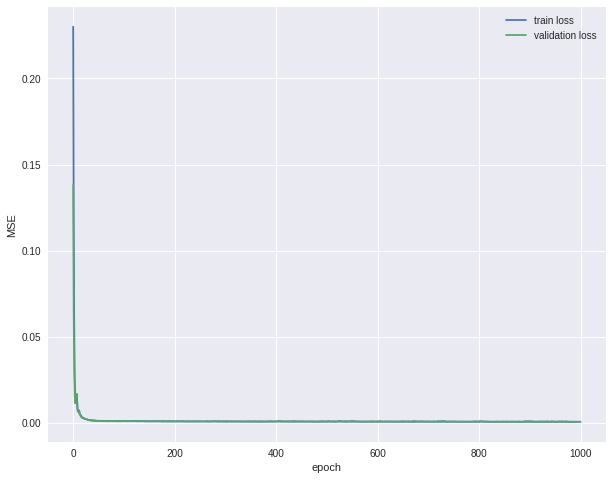

In [9]:
import matplotlib.pyplot as plt
import seaborn
plt.style.use("seaborn")
%matplotlib inline

plt.figure(figsize = (10, 8))
plt.plot(train_loss, label = "train loss")
plt.plot(val_loss, label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.legend()
plt.show()